In [1]:
import networkx as nx

from models import RandomWalk, PearsonRandomWalk, RandomWalkOnGraph
from list_3.models import random_graph

import matplotlib.pyplot as plt
import numpy as np

## 1. Simulate a random walk of an agent on a square lattice. The program should take a snapshot of the lattice in every time step and save it to a jpg or png file. These files should then be used to generate a movie (avi or animated gif).

In [2]:
walk = RandomWalk()
position_list = walk.generate(starting_position=(3, 3), num_of_steps=10)

position_list

[(3.0, 3.0),
 (3.0, 4.0),
 (3.0, 5.0),
 (3.0, 4.0),
 (3.0, 3.0),
 (3.0, 2.0),
 (4.0, 2.0),
 (4.0, 1.0),
 (4.0, 0.0),
 (5.0, 0.0),
 (5.0, -1.0)]

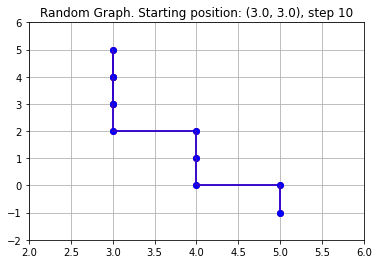

In [3]:
walk.save_walk_to_gif()
# change that there

![SegmentLocal](data/RandomWalk.gif "segment")

## 2. Write a computer program to simulate Pearson’s random walk in the plane, where the steps have constant length a = 1 and uniformly distributed random angles. By simulating many long walks of N steps (e.g. $N = 1000$) starting from the origin, compute and plot normalized histograms (i.e. the PDFs) of $A_N$ , the fraction of time steps when the walker is in right half plane $(x > 0)$ and of $B_N$ , the fraction of time the walker is in the first quadrant $(x > 0, y > 0)$. The expected values are clearly $A_N$ $i = \frac{1}{2}$ and $B_N$ $i = \frac{1}{4}$, but what are the most probable values? Plot several trajectories to illustrate your results.


In [2]:
walk = PearsonRandomWalk()
position_list = walk.generate(starting_position=(0, 0), num_of_steps=10)

position_list

[(0.0, 0.0),
 (0.9472578470108041, 0.3204724189013092),
 (0.062182904496362656, -0.14497612404738058),
 (-0.7621873242437208, -0.711027116420879),
 (-0.6672549988170111, 0.2844566120192584),
 (-0.027309214210902932, -0.4839634506839955),
 (-0.7870450129631241, -1.1341953447758835),
 (0.18898285830203065, -1.3518409156327482),
 (0.7623427138068422, -2.171144568801402),
 (0.4109276708433228, -1.234924793546175),
 (1.3708302185490386, -0.9545908874483292)]

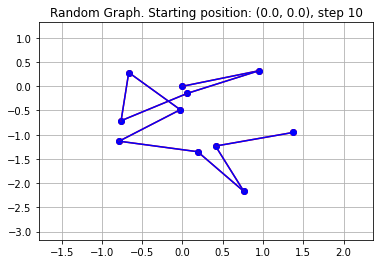

In [3]:
walk.save_walk_to_gif()

![SegmentLocal](data/PearsonRandomWalk.gif "segment")

statistics

In [6]:
 a_n, b_n = walk.get_stats(num_of_trajectories=1000, num_of_steps=1000)

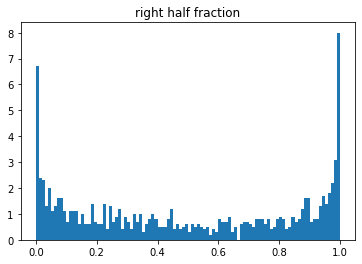

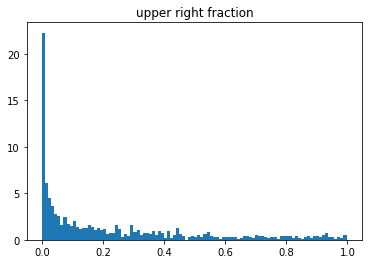

In [7]:
plt.figure()
plt.hist(a_n,bins=100, density=True)
plt.title('right half fraction')
plt.show()

plt.figure()
plt.hist(b_n, bins=100, density=True)
plt.title('upper right fraction')
plt.show()

In [8]:
print(f'right half fraction EX: {np.mean(a_n)}')
print(f'upper right fraction EX: {np.mean(b_n)}')

right half fraction EX: 0.49774899999999994
upper right fraction EX: 0.223709


## 3. Write a program that. . .
* will illustrate a random walk on a given graph (avi or animated gif),
* for a given origin node will estimate average hitting times of all other nodes.
## Compare the results for graphs of different topologies. Set N = 20 for visualization purposes and N = 100 otherwise.

In [2]:
walk = RandomWalkOnGraph()
x = random_graph(n=10, p=.5)
walk.network = x

position_list = walk.generate(starting_position=0, num_of_steps=10)

position_list

[0, 3, 4, 1, 3, 2, 4, 0, 5, 8, 7]

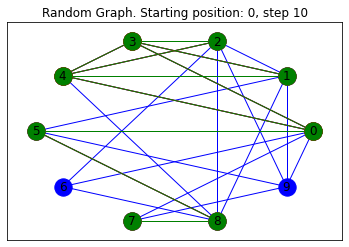

In [3]:
walk.save_walk_to_gif()

![SegmentLocal](data/RandomWalkOnGraph.gif "segment")

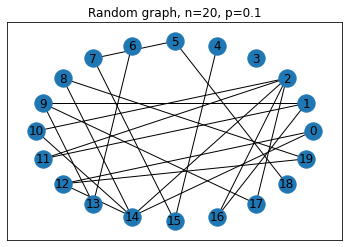

In [3]:
n=20
p=1/10
network = random_graph(n,p)

layout = nx.circular_layout(network)

nx.draw_networkx(network, pos=layout)
plt.title(f'Random graph, n={n}, p={p}')
plt.show()

In [4]:
walk = RandomWalkOnGraph()
walk.network = network

In [ ]:
mc = 1000

num_of_moves=50

global_stats = walk.get_stats

for i in range(mc-1):
    stats = walk.get_stats()
    global_stats = {key, val+stats[key] for key, val in stats}